In [4]:
import numpy as np
import pandas as pd
import multiprocessing

import matplotlib.pyplot as plt
import bokeh
import bokeh.io
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

# init_notebook_mode()

import seaborn as sns

import re
import math
import copy

from collections import defaultdict
import csv
import itertools
import datetime 
from datetime import datetime
import time
import dateutil.parser
import pickle
import random

import gc
import zipfile
import sys, getopt
import os

from IPython.core.interactiveshell import InteractiveShell
from io import StringIO

import dask.dataframe as dd
#from chest import Chest

InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last"

# Magic function to make matplotlib inline
%matplotlib inline

%config InlineBackend.figure_formats = {'png', 'retina'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

import dask.dataframe as ddf
import dask.array as da

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 800)

Loading BokehJS ...

In [ ]:
from scipy import integrate

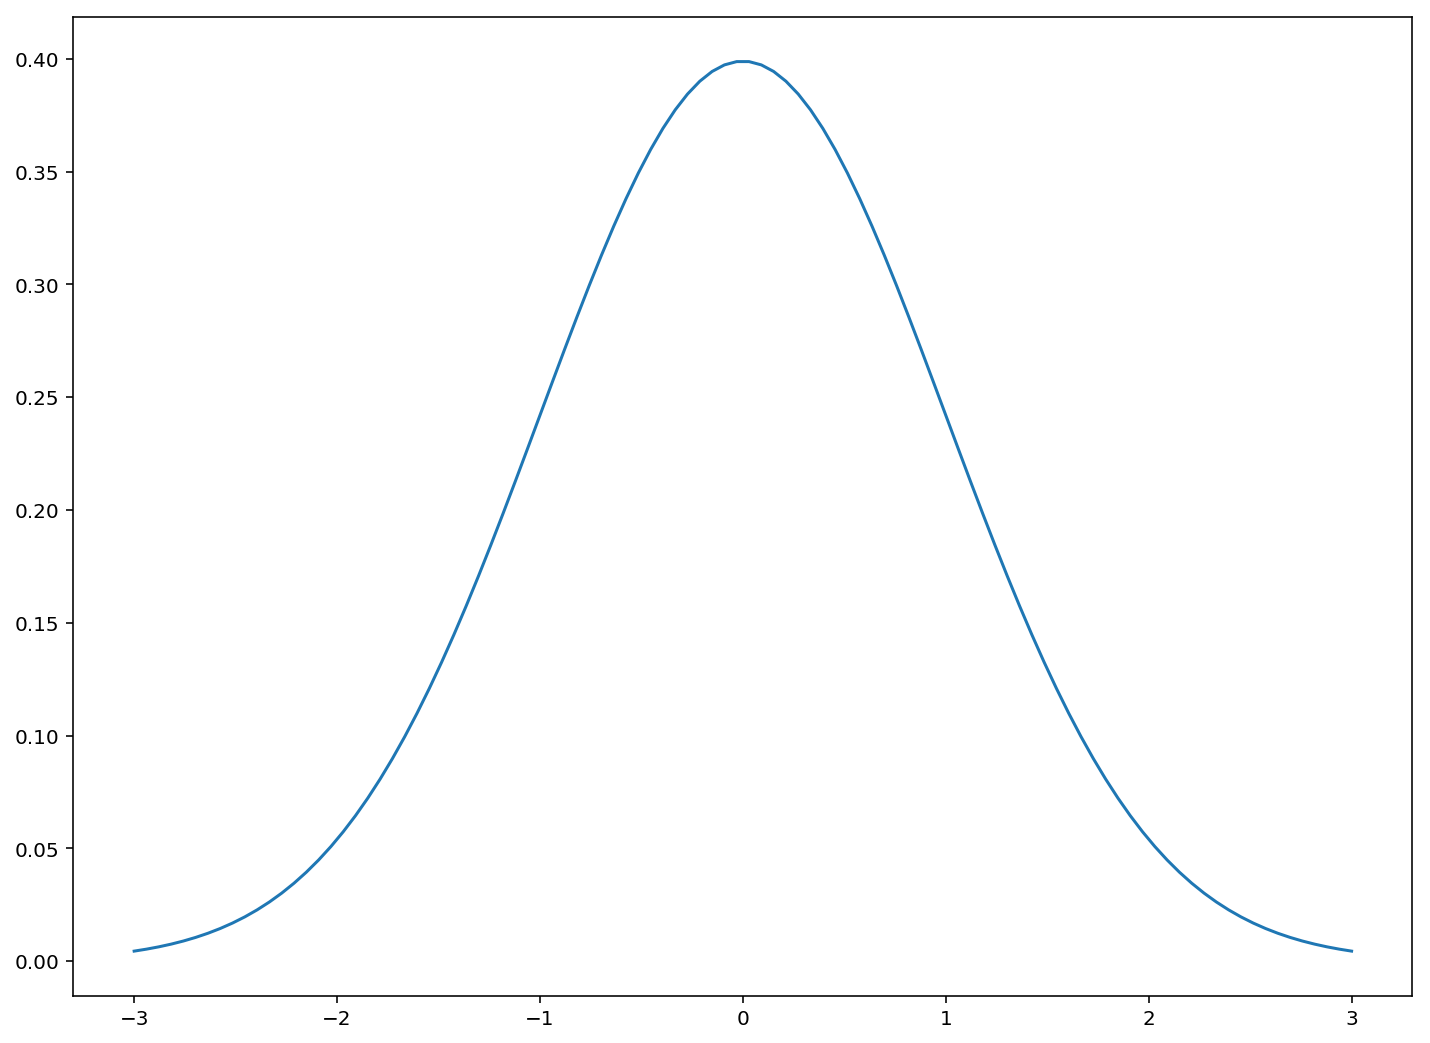

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

In [2]:
# Normal(mu, sigma) pdf
f = lambda x, mu, sigma: 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

In [15]:
# Loss|demand, buy, margin, cost
def L(d, b, margin, cost):
    if d > b:
        return (d - b)*margin
    elif d < b:
        return (b - d)*cost
    elif d == b:
        return 0
    else:
        print('Error')

In [24]:
# mu_0: we think demand will be N(mu_0, sigma_0)
# For article with cost = cost_0, margin = margin_0

def EL(b_0, mu_0, sigma_0, margin_0, cost_0):
    I = lambda x: L(x, b_0, margin_0, cost_0) * f(x, mu_0, sigma_0)
    return round(integrate.quad(I, 0, 50000)[0], 2)

In [25]:
EL(200, 150, 25, 10, 2)

102.55

In [48]:
# Suppose:
# We predict article demand of 1000, with low confidence (sigma = 100), margin = 80, cost = 20
mu_0 = 1000
sigma_0 = 220
margin_0 = 80
cost_0 = 20

lb = 500
ub = 2500

b = range(lb, ub, 1) # aim over/under our prediction 
ELs = pd.DataFrame([EL(b, mu_0, margin_0, sigma_0, cost_0) for b in range(lb, ub, 1)])[0] # Expected loss

l = pd.DataFrame({'buy': b, 'ExpectLoss': ELs})

In [45]:
l.head()

,buy,ExpectLoss
0,500,60000.0
1,501,59880.0
2,502,59760.0
3,503,59640.0
4,504,59520.0


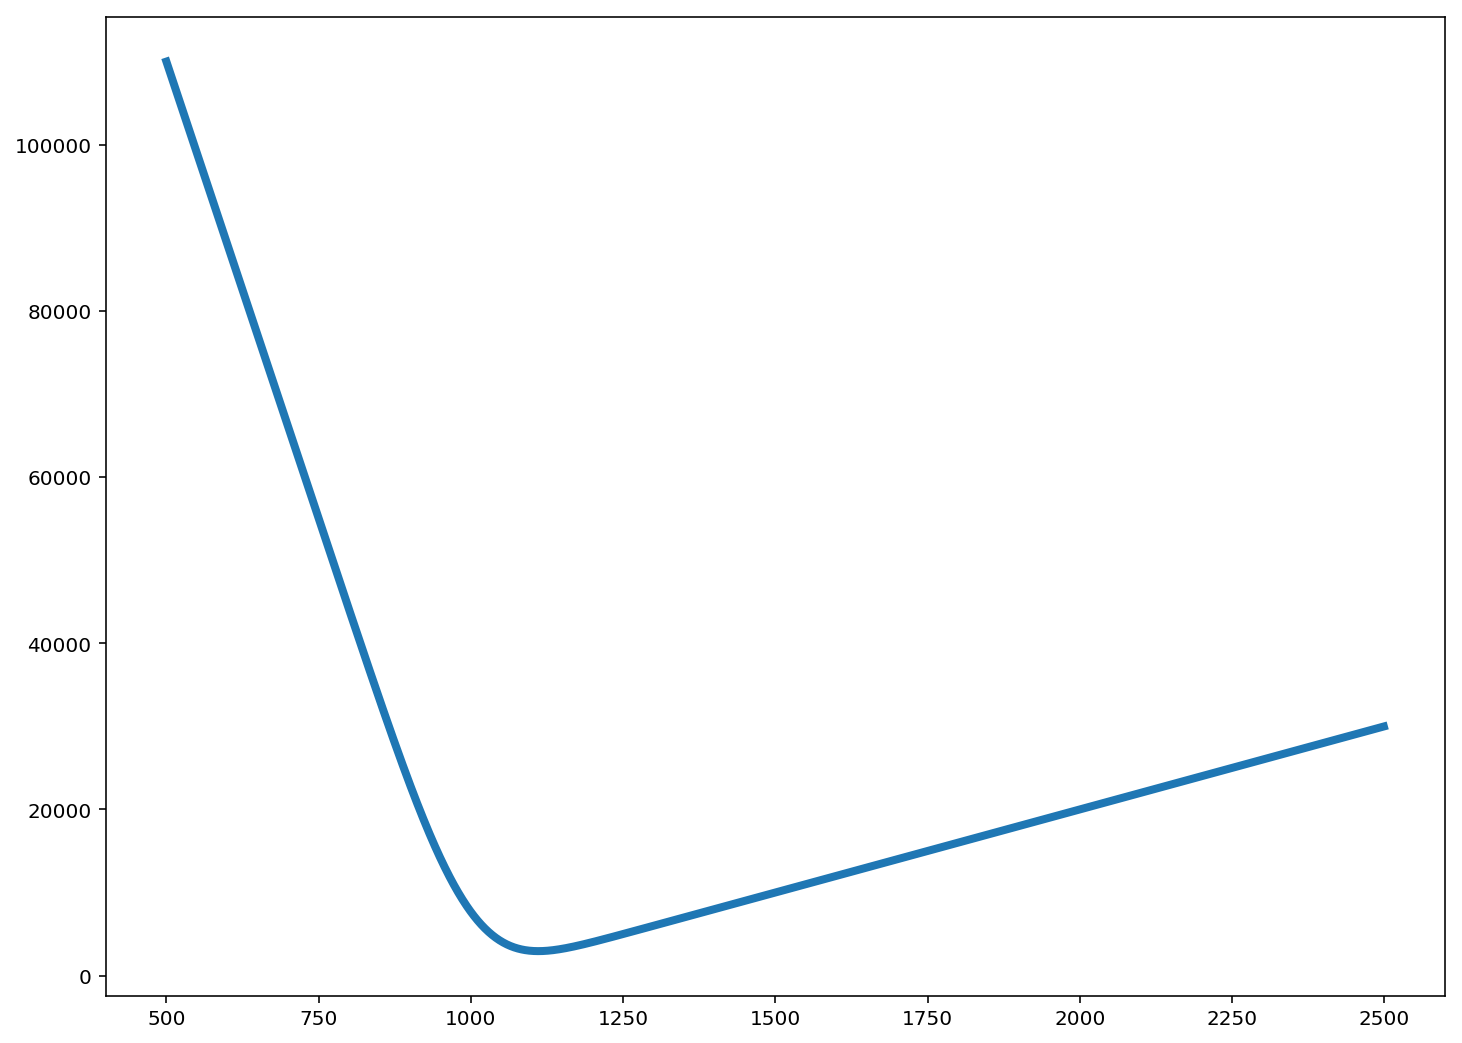

In [49]:
plt.rcParams["figure.figsize"] = [12,9]
plt.plot(l['buy'], l['ExpectLoss'], linewidth = 4)

In [51]:
l[l.ExpectLoss == l.ExpectLoss.min()]

L(mu_0, 1111, margin_0, cost_0)

,buy,ExpectLoss
611,1111,2943.64


2220